In [1]:
import json
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from dataclasses import dataclass

cm = 1 / 2.54  # centimeters in inches

In [2]:
@dataclass
class Entry:
    beginning_node: str
    end_node: str
    beginning: str
    end: str
    durations: np.ndarray

In [3]:
filename = "../out-alks/e2e.json"

In [4]:
with open(filename, "r") as f:
    data = json.load(f)

entries = []
for entry in data:
    beginning_node = entry["beginning_node"]
    end_node = entry["end_node"]
    beginning = entry["beginning"]
    end = entry["end"]
    durations = np.array(entry["durations"]) / 1_000_000 # convert nanoseconds to miliseconds
    
    entries.append(Entry(beginning_node, end_node, beginning, end, durations))

# entries.sort(key=lambda x: (x.beginning_node, x.beginning, x.end_node, x.end))

In [5]:
def plot_histogram(entry: Entry):
    bins = 200

    fig, ax = plt.subplots(layout="constrained", dpi=300, figsize=(14 * cm, 6 * cm))

    ax.hist(entry.durations, bins=bins, histtype="stepfilled", range=(0, 40.0))

    ax.set_xlabel("Duration [ms]")
    ax.set_ylabel("Count", labelpad=0)

    ax.grid(axis="y")
    ax.set_axisbelow(True)
    ax.set_yscale("log")
    ax.set_title(
        f"{entry.beginning_node} -> {entry.end_node}\n({entry.beginning} -> {entry.end})"
    )
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_ylim(bottom=1, top=1e3)
    ax.set_yticks(
        [np.sqrt(0.1), 1, 10, 100, 1000, 10000, 100_000], [str(i) for i in [0, 1, 10, 100, 1000, 10000, 100_000]]
    )

    filename = f"e2e-{entry.beginning_node}-{entry.end_node}.png"
    filename = filename.replace(":", "-")
    filename = filename.replace("/", "_")

    print(f"Saving {filename}")
    print("count:", len(entry.durations))
    print("min:", np.min(entry.durations))
    print("max:", np.max(entry.durations))
    print("median:", np.median(entry.durations))

    fig.savefig(filename)

Saving e2e-_carla_for_jupiter_rs-_flexray_viz_rs.png
count: 20711
min: 0.289054
max: 372.0964
median: 0.505851
Saving e2e-_carla_ros_bridge-_rviz2.png
count: 5875
min: 0.179367
max: 31.182175
median: 4.518472
Saving e2e-_flexray_viz_rs-_flexray_viz_rs.png
count: 1
min: 0.010039
max: 0.010039
median: 0.010039


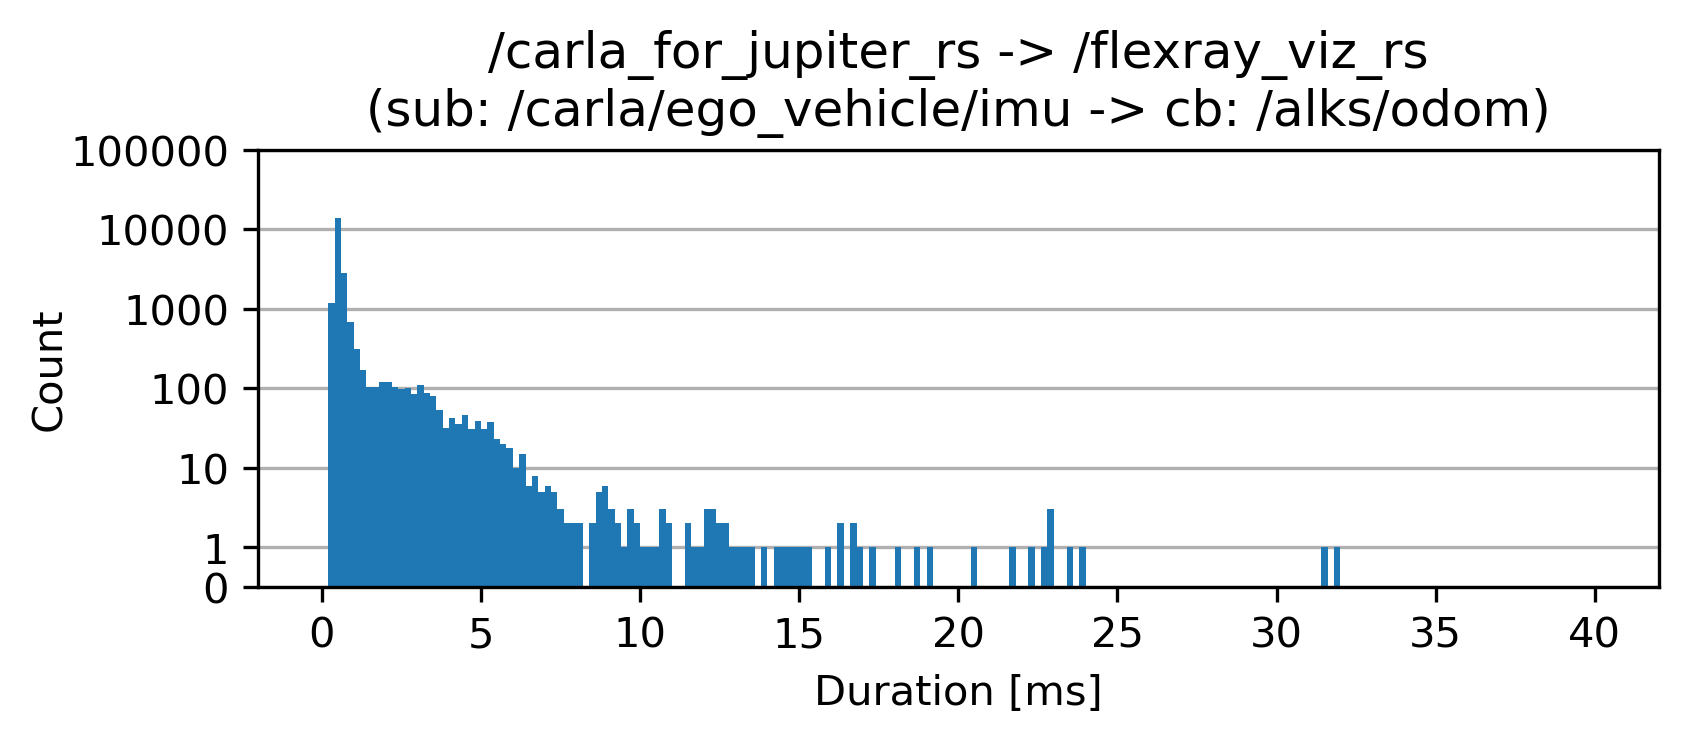

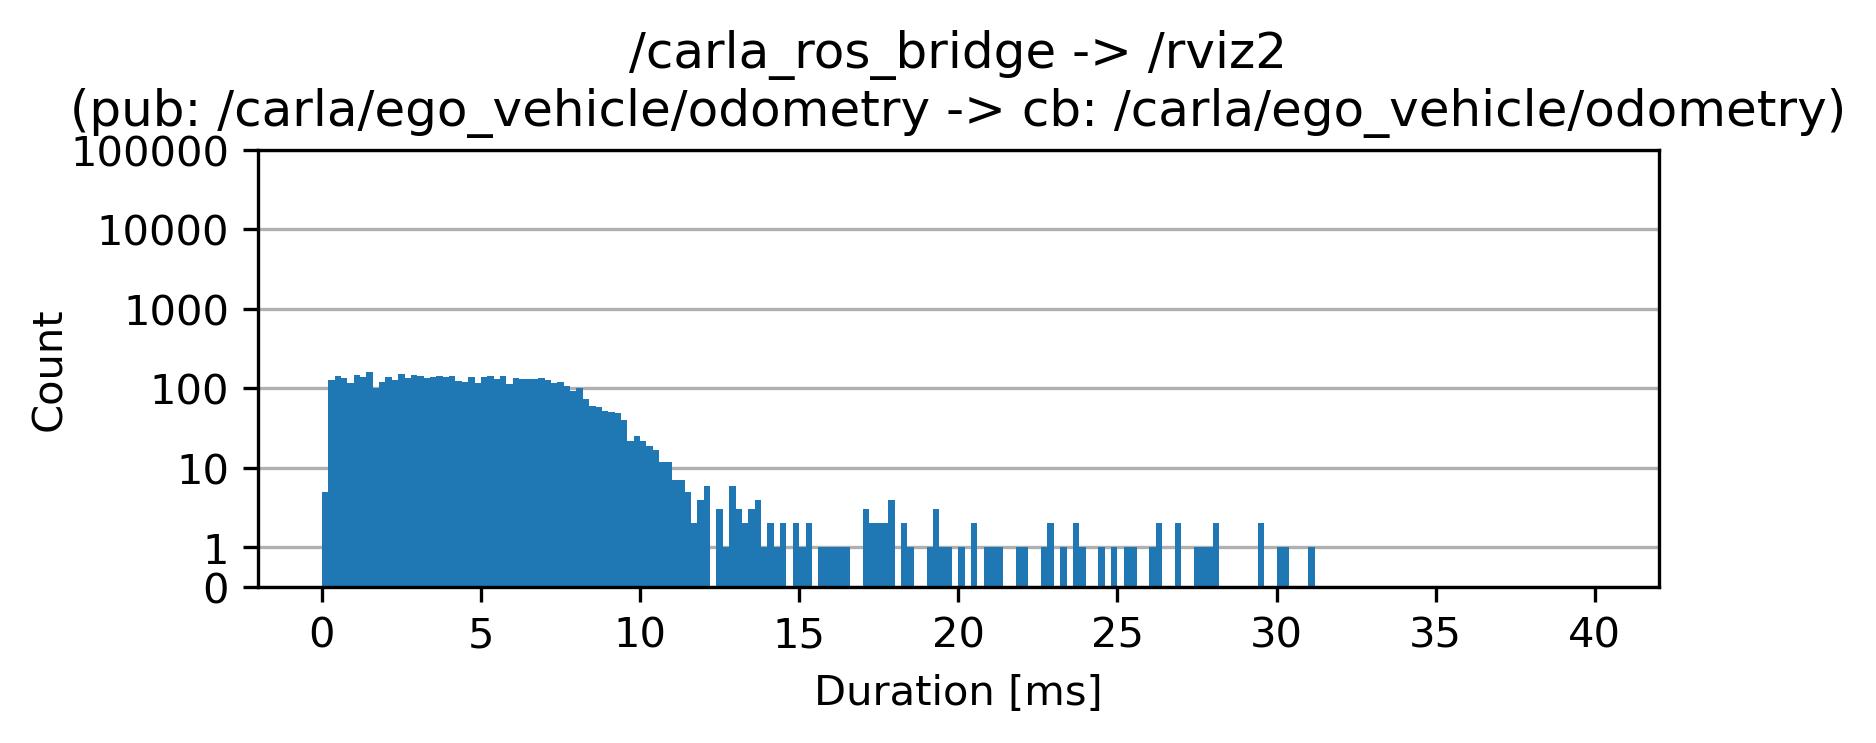

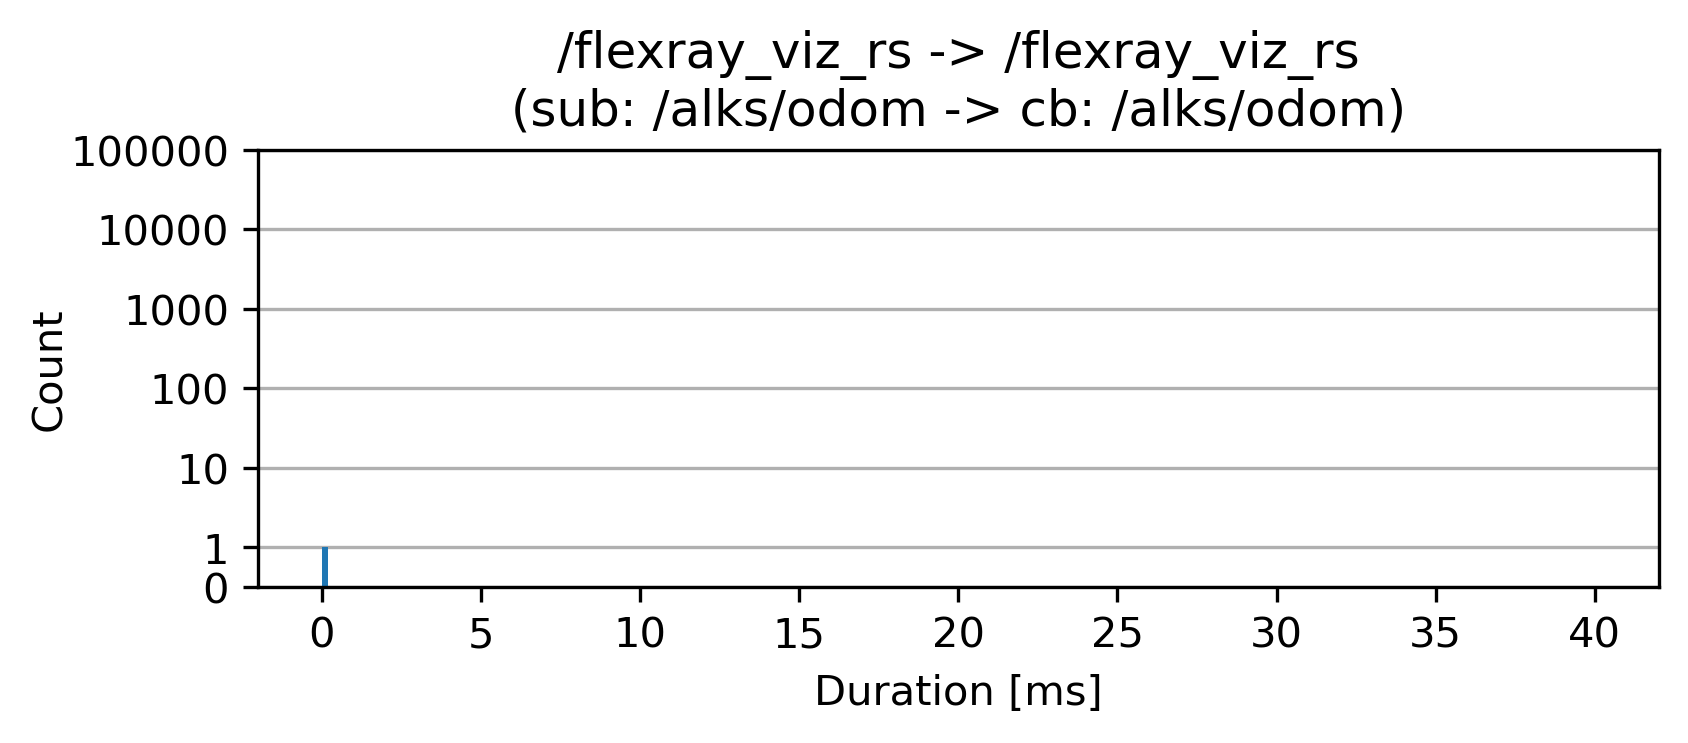

In [6]:
for entry in entries:
    if "odom" not in entry.end:
        continue

    plot_histogram(entry)